In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/svm-data/Social_Network_Ads - Social_Network_Ads.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_csv('/kaggle/input/svm-data/Social_Network_Ads - Social_Network_Ads.csv')
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
df.drop(columns=['User ID'],inplace=True)
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


/tmp/ipykernel_34/4143028677.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['EstimatedSalary'])
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Salary Distribution Plot')

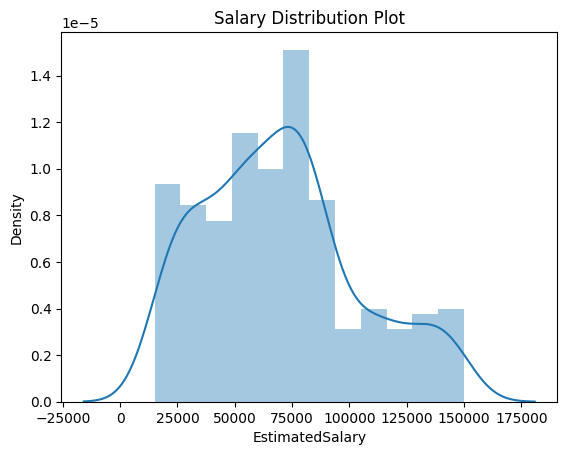

In [6]:
sns.distplot(df['EstimatedSalary'])
plt.title("Salary Distribution Plot")

Text(0.5, 1.0, 'Relationship between age and salary')

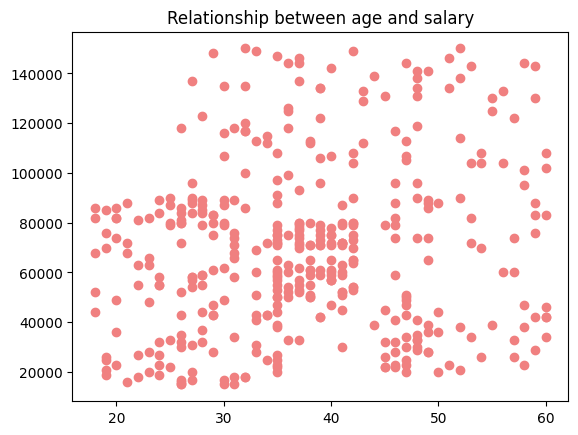

In [7]:
plt.scatter(df['Age'],df['EstimatedSalary'],color='lightcoral')
plt.title("Relationship between age and salary")

In [8]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df[['Gender']])

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
df.corr()

,Gender,Age,EstimatedSalary,Purchased
Gender,1.000000,-0.073741,-0.060435,-0.042469
Age,-0.073741,1.000000,0.155238,0.622454
EstimatedSalary,-0.060435,0.155238,1.000000,0.362083
Purchased,-0.042469,0.622454,0.362083,1.000000


<Axes: >

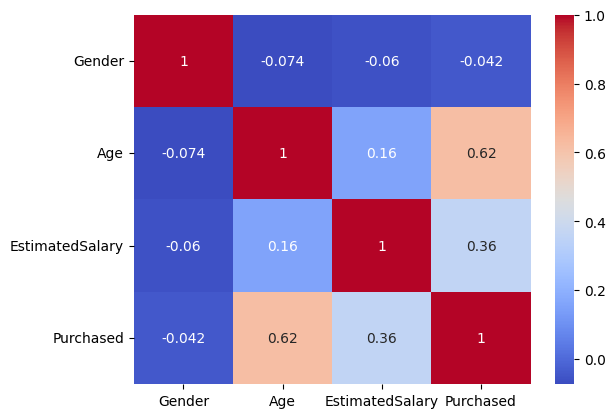

In [10]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [11]:
X = df.iloc[:,[1,2]].values
y = df.iloc[:,3].values

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [13]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
classifier = SVC(kernel='linear',random_state=0)
classifier.fit(X_train,y_train)

SVC(kernel='linear', random_state=0)

In [15]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1])

In [16]:
print("Accuracy Score",accuracy_score(y_test,y_pred)*100)

Accuracy Score 91.25


In [17]:
print("F1 Score",f1_score(y_test,y_pred)*100)

F1 Score 82.05128205128204


<Axes: >

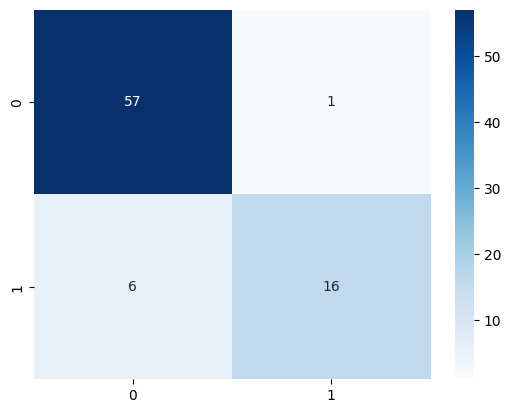

In [18]:
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Blues')

In [19]:
print("Classification Report",classification_report(y_test,y_pred))

Classification Report               precision    recall  f1-score   support

           0       0.90      0.98      0.94        58
           1       0.94      0.73      0.82        22

    accuracy                           0.91        80
   macro avg       0.92      0.86      0.88        80
weighted avg       0.91      0.91      0.91        80



In [20]:
sc = StandardScaler()